Uniform Linear Array (ULA) Array Response

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def ula_array_response(M_t, angle_deg, wavelength=1e-1, d2lambda=0.5):
    d_meter = d2lambda * wavelength
    angle_rad = np.deg2rad(angle_deg)
    exp = np.arange(0, M_t) * 2 * np.pi * d_meter * np.sin(angle_rad) / wavelength
    return np.exp(1j * exp)


def generate_ula_beampattern(M_t, angle_deg, wavelength=1e-1, d2lambda=0.5, rng_l=0, rng_r=360, resolution=1000,
                             normalized=True):
    a = ula_array_response(M_t, angle_deg, wavelength, d2lambda)
    bp = []
    angle_array = np.linspace(rng_l, rng_r, resolution)
    for angle in angle_array:
        array_response = ula_array_response(M_t, angle, wavelength, d2lambda)
        response = np.abs(np.dot(a.conj(), array_response))
        bp.append(response)
    bp = bp / np.max(bp) if normalized else bp  # Normalize if needed
    bp = 20 * np.log10(bp)  # Convert to dB
    return bp

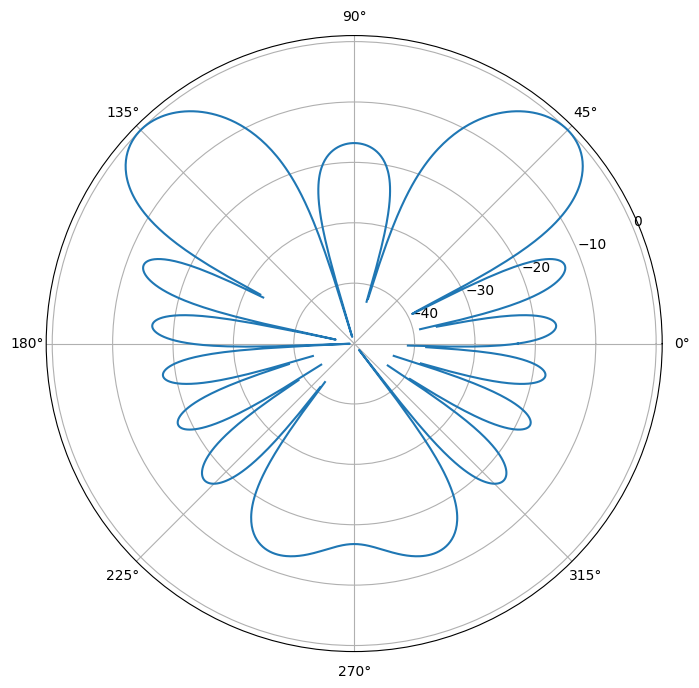

In [2]:
# ULA example usage

# Parameters
M_t = 8  # Number of antennas
angle_deg = 45  # Angle (degrees)
wavelength = 0.1  # Wavelength (m)
d2lambda = 0.5  # Antenna spacing (wavelengths)
plot_mode = 'polar'  # 'polar' / 'cartesian'

# Generate and plot beampattern
beampattern = generate_ula_beampattern(M_t, angle_deg, wavelength, d2lambda)
angles_deg = np.linspace(0, 360, 1000)
angles_rad = np.deg2rad(angles_deg)

if plot_mode == 'cartesian':
    # Plotting
    plt.figure(figsize=(8, 6))
    angles = np.linspace(0, 360, 360)
    plt.plot(angles_deg, beampattern)
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Beampattern')
    plt.grid(True)
    plt.ylim([-40, 1])
    plt.xlim([0, 360])
    plt.show()
elif plot_mode == 'polar':
    # Plotting (polar)
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles_rad, beampattern)
    ax.set_theta_zero_location('E')
    ax.set_theta_direction(1)
    ax.set_rlim(-50, 1)
    plt.grid(True)
    plt.show()
else:
    raise ValueError('plot_mode must be either "polar" or "cartesian"')

Uniform Circular Array (UCA) Array Response

In [3]:
# Uniform Circular Array: Response + Beampattern

import numpy as np
import matplotlib.pyplot as plt


# UCA array response function
def uca_array_response(M_t, radius, wavelength, azimuth_deg, elevation_deg=90):
    k = 2 * np.pi / wavelength
    azimuth_rad = np.deg2rad(azimuth_deg)
    elevation_rad = np.deg2rad(elevation_deg)

    phi_n = 2 * np.pi * np.arange(M_t) / M_t
    response = np.exp(1j * k * radius * np.sin(elevation_rad) * np.cos(azimuth_rad - phi_n))
    return response


# Beampattern generation
def generate_uca_beampattern(M_t, radius, wavelength, azimuth_deg, elevation_deg=90, resolution=1000, rng_l=0,
                             rng_r=360, sweep='azimuth'):
    angles_deg = np.linspace(rng_l, rng_r, resolution)
    steering_vector = uca_array_response(M_t, radius, wavelength, azimuth_deg, elevation_deg)
    beampattern = []

    for angle in angles_deg:
        if sweep == 'azimuth':
            array_response = uca_array_response(M_t, radius, wavelength, azimuth_deg=angle, elevation_deg=elevation_deg)
        elif sweep == 'elevation':
            array_response = uca_array_response(M_t, radius, wavelength, azimuth_deg=azimuth_deg, elevation_deg=angle)
        else:
            raise ValueError('sweep must be either "azimuth" or "elevation"')
        response = np.abs(np.dot(steering_vector.conj(), array_response))
        beampattern.append(response)

    beampattern = 20 * np.log10(beampattern / np.max(beampattern))  # Normalize and convert to dB
    return beampattern

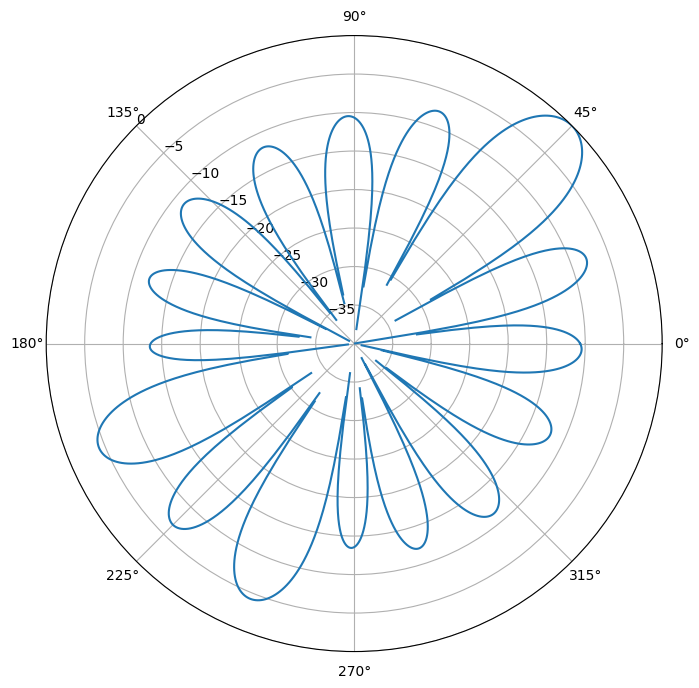

In [5]:
# UCA example usage

# Parameters
M_t = 16  # Number of antennas
radius = 0.2  # Array radius (m)
wavelength = 0.1  # Wavelength (m)
azimuth_angle = 45  # Azimuth angle (degrees)
elevation_angle = 45  # Elevation angle (degrees)
sweep = 'azimuth'  # 'azimuth' / 'elevation'
plot_mode = 'polar'  # 'polar' / 'cartesian'

# Generate and plot beampattern
beampattern = generate_uca_beampattern(M_t, radius, wavelength, azimuth_deg=azimuth_angle,
                                       elevation_deg=elevation_angle, sweep=sweep)
angles_deg = np.linspace(0, 360, 1000)
angles_rad = np.deg2rad(angles_deg)

if plot_mode == 'cartesian':
    # Plotting
    plt.figure(figsize=(8, 6))
    angles = np.linspace(0, 360, 360)
    plt.plot(angles_deg, beampattern)
    plt.xlabel(f'{sweep} angle (degrees)')
    plt.ylabel('Beampattern (dB)')
    plt.grid(True)
    plt.ylim([-40, 1])
    plt.xlim([0, 360])
    plt.show()
else:
    # Plotting (polar)
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles_rad, beampattern)
    if sweep == 'elevation':
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(-1)
    elif sweep == 'azimuth':
        ax.set_theta_zero_location('E')
        ax.set_theta_direction(1)
    ax.set_rlim(-40, 0)
    ax.set_rlabel_position(135)
    plt.grid(True)
    plt.show()